<a href="https://colab.research.google.com/github/sashavlasits/Data-Science/blob/main/Unit2/SashVlasU2proj_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pymc as pm

In [2]:
import numpy as np

In [3]:
import arviz as az

In [6]:
!pip install preliz
import preliz as pz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 7.8 MB/s eta 0:00:00


Context:

The New York Times publishes a variety of games for the enjoyment of their viewers who choose to drop lots of money on a subscription beyond their ordinary news coverage. One of these is the Connections, a game that is availible once daily in which users get 16 words and have to match them into four categories of four words each. Users get four guesses and after the fourth incorrect guess they are said to have failed the game. I will be finding my true percentage of solved games, AKA my overall solve rate. This project will serve to either confirm or undermine my ego.

Prior:

I believe that my solve rate is around 85%, based on nothing more than my own aforementioned ego. This is a reasonable estimate because I have found, due to personal experience, that I seem to complete the connections most of the time, but not without some failure.

<Axes: >

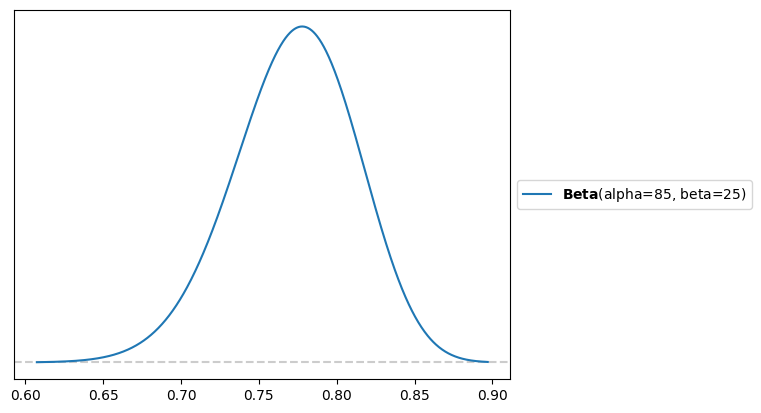

In [9]:
pz.Beta(alpha=85,beta=25).plot_pdf()

Data:

To find my data, I went through my connections archive as provided by the New York Times Games website and recorded all of my failed games since I started playing the game every day, on June 15, 2024. I found that I had failed 77 times out of 451 total games played. This data is relevant to my question, because my previous rate of correctly completing the game will be a very helpful predictor of my future performance, assuming my skill level at the game does not drastically change.

In [ ]:
Connections_Data_2425 = np.repeat([1,0], repeats = [374,77])
with pm.Model() as Connections_Data_2425_model:
  θ = pm.Beta('θ' , alpha = 374. , beta = 77.)
  y = pm.Bernoulli('y', p = θ, observed = Connections_Data_2425)
  idata_Connections_Data_2425 = pm.sample(2000)

<Axes: title={'center': 'θ'}>

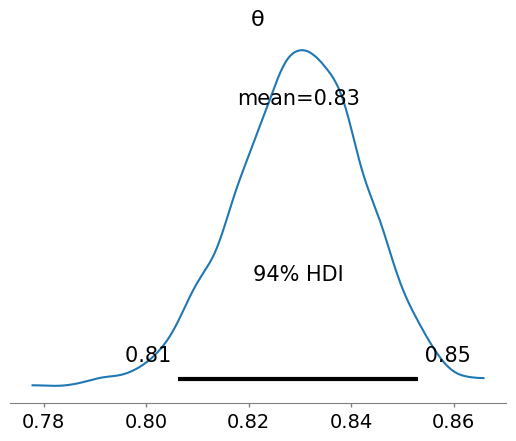

In [ ]:
az.plot_posterior(idata_Connections_Data_2425)

Conclusion:

The posterior that I found from my data analysis is .83, or an 83% success rate. This is very close to the success rate that I predicted, which was 85%. .85 is within the main body of the curve, so it can be seen as a relatively likely value. This makes sense because I am likely to be well acquainted with my own word game talents, at least in a more general abstract sense. I think that, given the simplicity of the question, this is a pretty good model to use to find the answer to this question. This data can be nothing but binary, so a binomial function makes sense to use.  